In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
import xgboost as xgb

In [4]:
file = open("CALI.csv")
data=pd.read_csv(file,)
df_x = pd.DataFrame(data, columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude'])
df_y = pd.DataFrame(data,columns=['HOUSING PRICE'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

1. learning_rate: step size shrinkage used to prevent overfitting.
2. max_depth: determines how deeply each tree is allowed to grow during any boosting round.
3. subsample: percentage of samples used per tree. Low value can lead to underfitting.
4. colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
5. n_estimators: number of trees you want to build.
6. objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification      problems with only decision, binary:logistic for classification problems with probability.
7. gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
8. alpha: L1 regularization on leaf weights. A large value leads to more regularization.
9. lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [23]:
# XGBoost in action...
params = {'n_estimators': 500, "objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01,
                'max_depth': 4, 'alpha': 1}
xg_reg = xgb.XGBRegressor(**params)

xg_reg.fit(x_train,y_train)
y_predicted = xg_reg.predict(x_test)

[16:00:23] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 0.30
Test Variance score: 0.77


In [25]:
# Gradient boosting in action...
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_train, y_train)
y_predicted_2 = model.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted_2))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted_2))

/home/sjtu/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean squared error: 0.28
Test Variance score: 0.78


[16:01:11] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


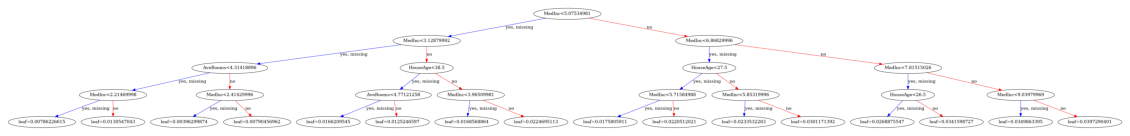

In [26]:
#XGBoost Visualizations
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.01, 'max_depth': 4, 'alpha': 1}
data_dmatrix = xgb.DMatrix(data=df_x,label=df_y)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = (200.0, 100.0)
plt.show()

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - percentage lower status of the population

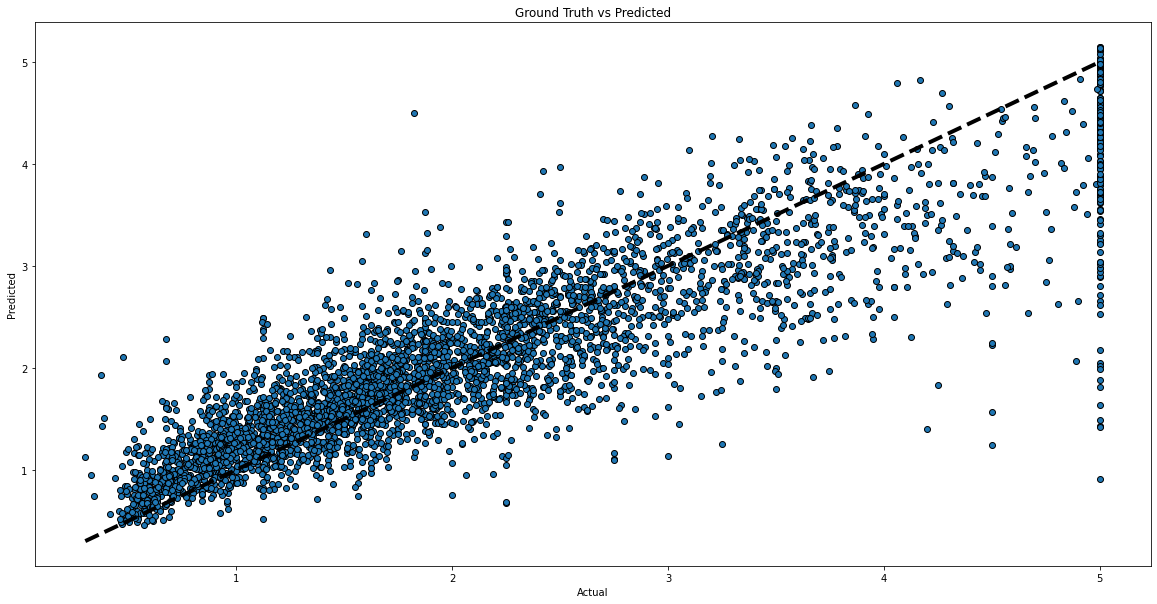

In [29]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()